In [56]:
import pandas as pd
import matplotlib as plt
clienti = pd.read_csv(r"../data/processed/customers_processedDateTime_2025_03_23_230046.csv")
ordini = pd.read_csv(r"../data/processed/orders_processedDateTime_2025_03_23_231112.csv")
print(clienti.head(100))

                         customer_id          region       city    cap
0   4e7b3e00288586ebd08712fdd0374a03        Campania  Benevento  82100
1   4f2d8ab171c80ec8364f7c12e35b23ad  Emilia Romagna    Bologna  40121
2   fd826e7cf63160e536e0908c76c3f441        Campania    Salerno  84121
3   6f92779347724b67e44e3224f3b4cffd  Emilia Romagna     Modena  41121
4   261cb4f92498ca05d5bd1a327a261d9c  Emilia Romagna      Parma  43121
..                               ...             ...        ...    ...
95  eb03682e1118b3af176b229932bfa8be        Sardegna   Oristano   9170
96  e255bea28fdeb105b85a23947349cca5        Sardegna   Cagliari   9124
97  fe6d73ac006153a398439253006e5adc        Calabria    Cosenza  87100
98  05323a24770d4897bba59aab79f6d7b0        Sardegna    Sassari   7100
99  aa0fbd830c89acc3d79d311ff43d0920         Liguria  La Spezia  19124

[100 rows x 4 columns]


In [30]:
print(ordini.head(100))


                            order_id                       customer_id  \
0   e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1   53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2   47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3   949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4   ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
..                               ...                               ...   
95  77e9941864fc840be8e4b1ba5347c0f7  3135962ee745ef39b85576df7ddbaa99   
96  41bb5cee06dbf170878a9ef93ac7e7f5  1833a0540067becaf59368fe4cd4303a   
97  6a0a8bfbbe700284feb0845d95e0867f  68451b39b1314302c08c65a29f1140fc   
98  f7959f8385f34c4f645327465a1c9fc4  0bf19317b1830a69e55b40710576aa7a   
99  23f553848a03aaab35bb3f9f87725125  c622b892a190735ef81c0087973fa16d   

   order_status order_purchase_timestamp order_delivered_customer_date  \
0     delivered      2017-10-02 10:56

In [31]:
clienti_per_regione = clienti["region"].value_counts()
print(clienti_per_regione)

region
Lombardia                8870
Lazio                    8477
Campania                 8162
Sicilia                  7290
Veneto                   7117
Piemonte                 7012
Emilia Romagna           6866
Calabria                 6500
Puglia                   6066
Sardegna                 5021
Liguria                  4802
Toscana                  4713
Marche                   3805
Abruzzo                  3513
Friuli Venezia Giulia    3063
Trentino Alto Adige      2136
Umbria                   1971
Basilicata               1909
Molise                   1222
Valle d'Aosta             926
Name: count, dtype: int64


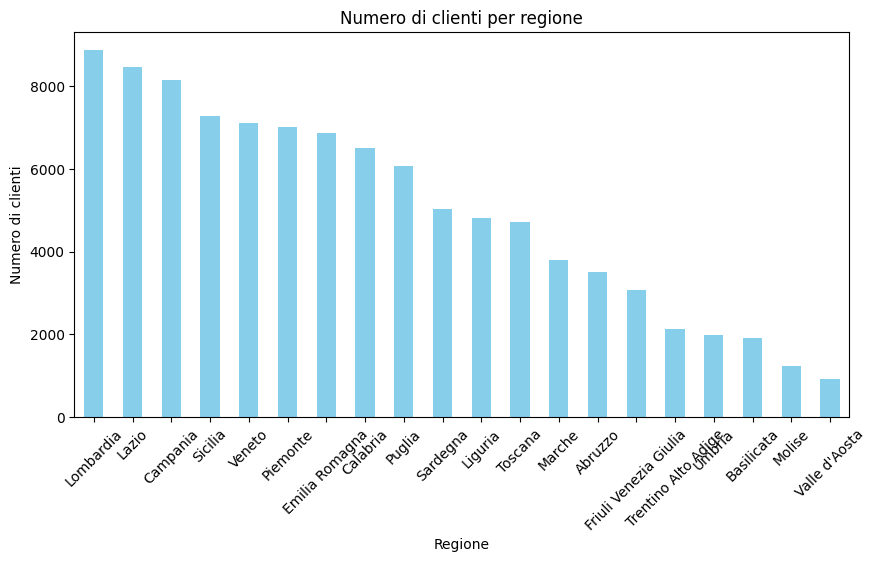

In [64]:
# Creazione del grafico
#divisione clienti per regione
plt.figure(figsize=(10, 5))
clienti_per_regione.plot(kind="bar", color="skyblue")

# Aggiungere titoli ed etichette
plt.title("Numero di clienti per regione")
plt.xlabel("Regione")
plt.ylabel("Numero di clienti")
plt.xticks(rotation=45)

# Mostrare il grafico
plt.show()

In [62]:
#divisione per città nella regione

# Caricare i dati
clienti = pd.read_csv(r"../data/processed/customers_processedDateTime_2025_03_23_230046.csv")

# Conta i clienti per Regione e Città
clienti_per_citta = clienti.groupby(["region", "city"]).size().reset_index(name="conteggio")

# Ordinare e selezionare le prime 15 città con più clienti
top_15_citta = clienti_per_citta.sort_values(by="conteggio", ascending=False).head(15)

# Visualizzare i dati raggruppati
print(top_15_citta)

            region             city  conteggio
9         Calabria  Reggio Calabria       2947
32           Lazio             Roma       2370
71        Sardegna         Cagliari       2027
14        Campania           Napoli       1743
62        Piemonte           Torino       1699
12        Campania        Benevento       1666
30           Lazio           Latina       1617
15        Campania          Salerno       1610
11        Campania         Avellino       1605
33           Lazio          Viterbo       1567
13        Campania          Caserta       1538
36         Liguria        La Spezia       1521
31           Lazio            Rieti       1480
65          Puglia             Bari       1449
16  Emilia Romagna          Bologna       1444


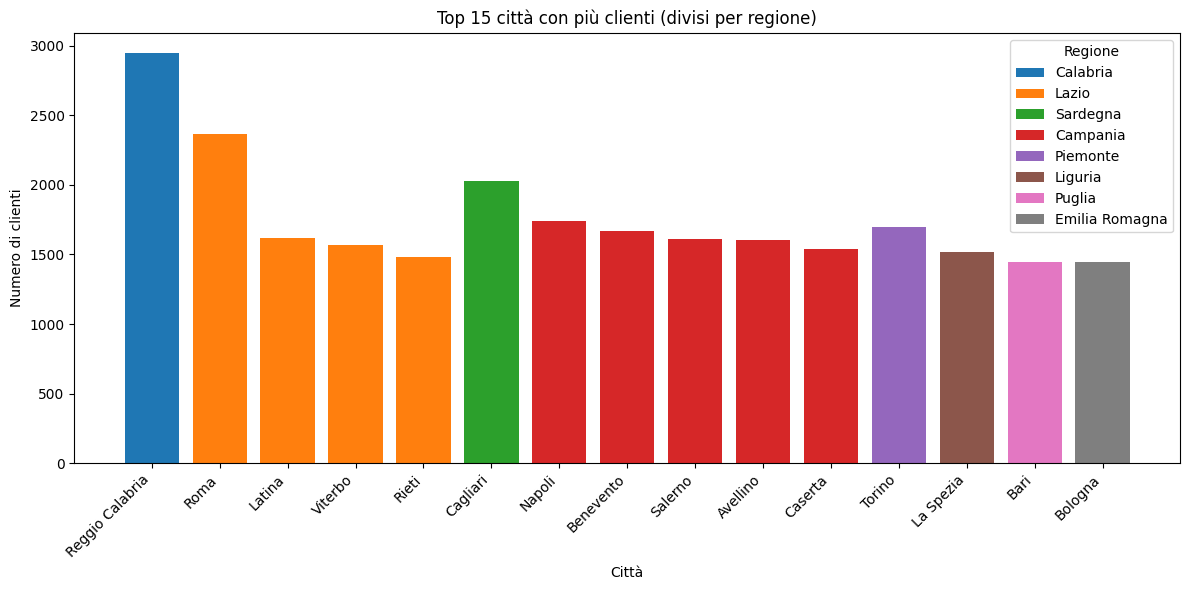

In [40]:
# Creare il grafico
plt.figure(figsize=(12, 6))

# Creare un grafico a barre per le top 15 città
for regione in top_15_citta["region"].unique():
    # Filtrare i dati per ogni regione
    dati_regione = top_15_citta[top_15_citta["region"] == regione]
    # Creare un grafico a barre per ogni regione
    plt.bar(dati_regione["city"], dati_regione["conteggio"], label=regione)

# Aggiungere titoli ed etichette
plt.title("Top 15 città con più clienti (divisi per regione)")
plt.xlabel("Città")
plt.ylabel("Numero di clienti")
plt.xticks(rotation=45, ha="right")  # Ruotare le etichette delle città

# Aggiungere la legenda
plt.legend(title="Regione")

# Mostrare il grafico
plt.tight_layout()
plt.show()

In [63]:
#prodotti più presenti nel db
# Caricare il file CSV (modifica con il percorso del tuo file)
df_product = pd.read_csv("../data/raw/olistIT_products.csv")

# Visualizzare le prime righe del DataFrame
df_product.head()

,product_id,category,product_name_lenght,product_description_lenght,product_photos_qty
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0


In [51]:
# Raggruppare i dati per categoria e contare i prodotti per categoria
prodotti_per_categoria = df_product.groupby("category")["product_id"].count().reset_index(name="product_count")

# Ordinare i risultati in ordine decrescente
prodotti_per_categoria = prodotti_per_categoria.sort_values(by="product_count", ascending=False)

# Mostrare i primi 10 risultati
prodotti_per_categoria.head(10)

,category,product_count
7,bed_bath_table,3029
62,sports_leisure,2867
36,furniture_decor,2657
40,health_beauty,2444
46,housewares,2335
5,auto,1900
14,computers_accessories,1639
66,toys,1411
68,watches_gifts,1329
65,telephony,1134


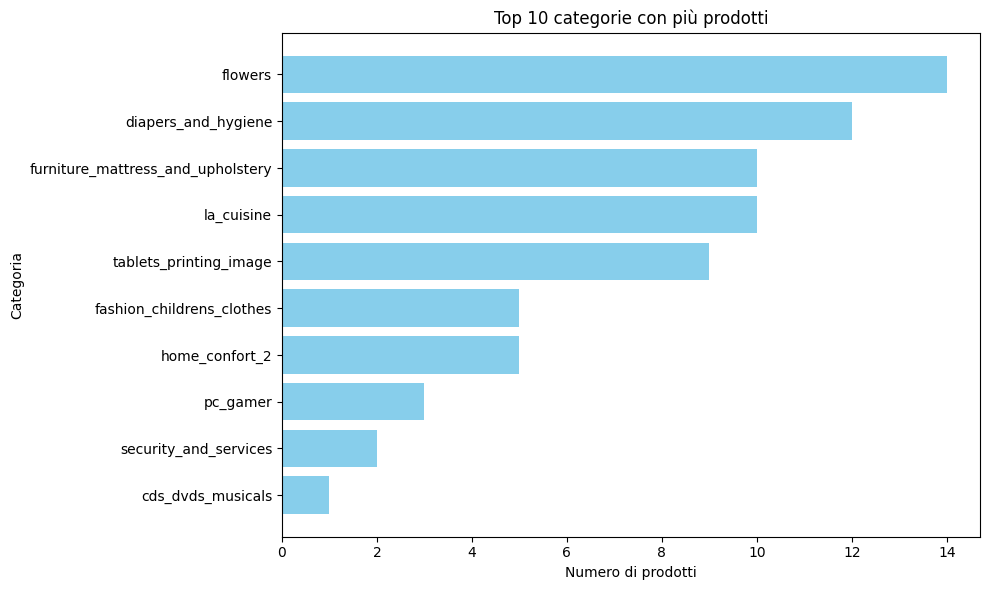

In [55]:
prodotti_per_categoria_sorted = prodotti_per_categoria.sort_values(by='product_count', ascending=True)

# Creare un grafico a barre
plt.figure(figsize=(10, 6))
plt.barh(prodotti_per_categoria_sorted.head(10)['category'], prodotti_per_categoria_sorted.head(10)['product_count'], color='skyblue')

# Aggiungere titoli ed etichette
plt.title('Top 10 categorie con più prodotti')
plt.xlabel('Numero di prodotti')
plt.ylabel('Categoria')

# Mostrare il grafico
plt.tight_layout()
plt.show()